In [102]:
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Data file path for Population Growth and Housing Supply Estimate
pop_growth = "Resources/Pop_Growth.csv"
house_supply = "Resources/Housing_Inventory_Estimate.csv"
pop = "Resources/US_Population.csv"

In [103]:
pop_df = pd.read_csv(pop_growth)
supply_df = pd.read_csv(house_supply)
total_pop = pd.read_csv(pop)


#pop_df = pop_df.rename(columns = {"DATE":"Date", "SPPOPGROWUSA":"Population_Growth"})
#pop_yearly_df = pop_df.groupby('Year', as_index = False)['Population_Growth'].sum()

#supply_df = supply_df.rename(columns = {"DATE":"Date", "ETOTALUSQ176N":"Supply"})
#supply_yearly_df = supply_df.groupby('Year', as_index = False)['Supply'].sum()


pop_df.head(30)
#supply_df.head(30)

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172
5,1966-01-01,1.154893
6,1967-01-01,1.088881
7,1968-01-01,0.998461
8,1969-01-01,0.977243
9,1970-01-01,1.165003


In [104]:
supply_df.head()

,DATE,ETOTALUSQ176N
0,2000-04-01,116047.0
1,2000-07-01,116482.0
2,2000-10-01,116914.0
3,2001-01-01,117347.0
4,2001-04-01,117786.0


In [105]:
total_pop.head()

,DATE,POPTHM
0,1959-01-01,175818.0
1,1959-02-01,176044.0
2,1959-03-01,176274.0
3,1959-04-01,176503.0
4,1959-05-01,176723.0


In [106]:
combined_df = pd.merge(pop_df, supply_df, how = "inner", on = "DATE")
combined_df = pd.merge(combined_df, total_pop, how = "inner", on = "DATE")

combined_df = combined_df.rename(columns = {"DATE":"Date", "ETOTALUSQ176N":"Supply", "SPPOPGROWUSA":"Population_Growth", "POPTHM":"Total_Population"})

combined_df["Date"] = pd.to_datetime(combined_df["Date"])
combined_df["Date"] = combined_df["Date"].dt.year

combined_df["Supply"] = combined_df["Supply"].astype(int)
combined_df["Total_Population"] = combined_df["Total_Population"].astype(int)
combined_df["Population_Growth"] = combined_df["Population_Growth"].astype(float)

combined_df.head

<bound method NDFrame.head of     Date  Population_Growth  Supply  Total_Population
0   2001           0.989741  117347            283960
1   2002           0.927797  119061            286739
2   2003           0.859482  120792            289412
3   2004           0.925484  122632            292046
4   2005           0.921713  124611            294768
5   2006           0.964254  126584            297526
6   2007           0.951055  128439            300398
7   2008           0.945865  129968            303280
8   2009           0.876651  131001            306035
9   2010           0.829617  131626            308706
10  2011           0.726787  132117            311204
11  2012           0.733600  132619            313636
12  2013           0.692860  133234            316038
13  2014           0.733362  134005            318464
14  2015           0.736217  134862            320997
15  2016           0.724676  135795            323509
16  2017           0.632644  136818            32590

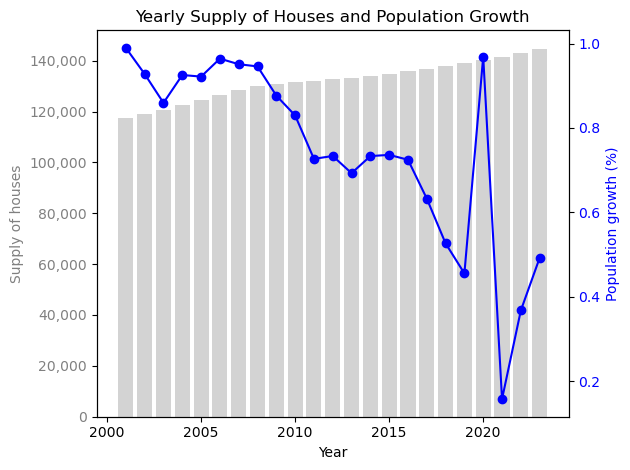

In [107]:
fig, ax1 = plt.subplots()

ax1.bar(combined_df['Date'], combined_df['Supply'], color='lightgray', label='House Supply')
ax1.set_xlabel('Year')
ax1.set_ylabel('Supply of houses', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['Population_Growth'], color='blue', marker='o', label='Population Growth')
ax2.set_ylabel('Population growth (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Yearly Supply of Houses and Population Growth')
fig.tight_layout()

plt.show()


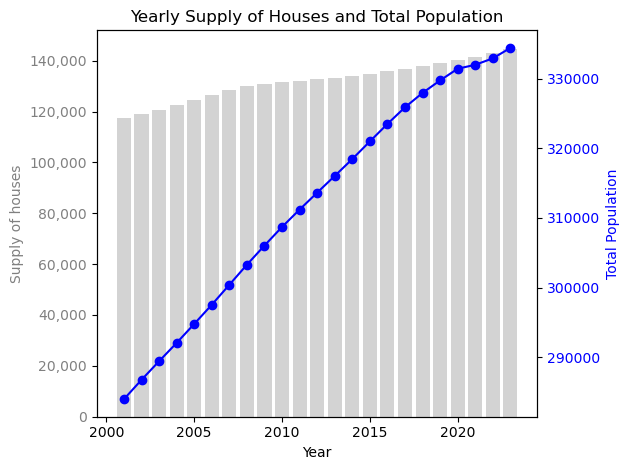

In [108]:
fig, ax1 = plt.subplots()

ax1.bar(combined_df['Date'], combined_df['Supply'], color='lightgray', label='House Supply')
ax1.set_xlabel('Year')
ax1.set_ylabel('Supply of houses', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['Total_Population'], color='blue', marker='o', label='Total_Population')
ax2.set_ylabel('Total Population', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')



plt.title('Yearly Supply of Houses and Total Population')
fig.tight_layout()

plt.show()


In [109]:
average_household_size = 2.5  # Average number of people per household

combined_df['Population increase'] = combined_df['Total_Population'].diff().fillna(0)
combined_df['Housing demand'] = combined_df['Population increase'] / average_household_size

In [110]:
print(combined_df[['Date', 'Population increase', 'Housing demand']])


    Date  Population increase  Housing demand
0   2001                  0.0             0.0
1   2002               2779.0          1111.6
2   2003               2673.0          1069.2
3   2004               2634.0          1053.6
4   2005               2722.0          1088.8
5   2006               2758.0          1103.2
6   2007               2872.0          1148.8
7   2008               2882.0          1152.8
8   2009               2755.0          1102.0
9   2010               2671.0          1068.4
10  2011               2498.0           999.2
11  2012               2432.0           972.8
12  2013               2402.0           960.8
13  2014               2426.0           970.4
14  2015               2533.0          1013.2
15  2016               2512.0          1004.8
16  2017               2392.0           956.8
17  2018               2068.0           827.2
18  2019               1797.0           718.8
19  2020               1677.0           670.8
20  2021                564.0     

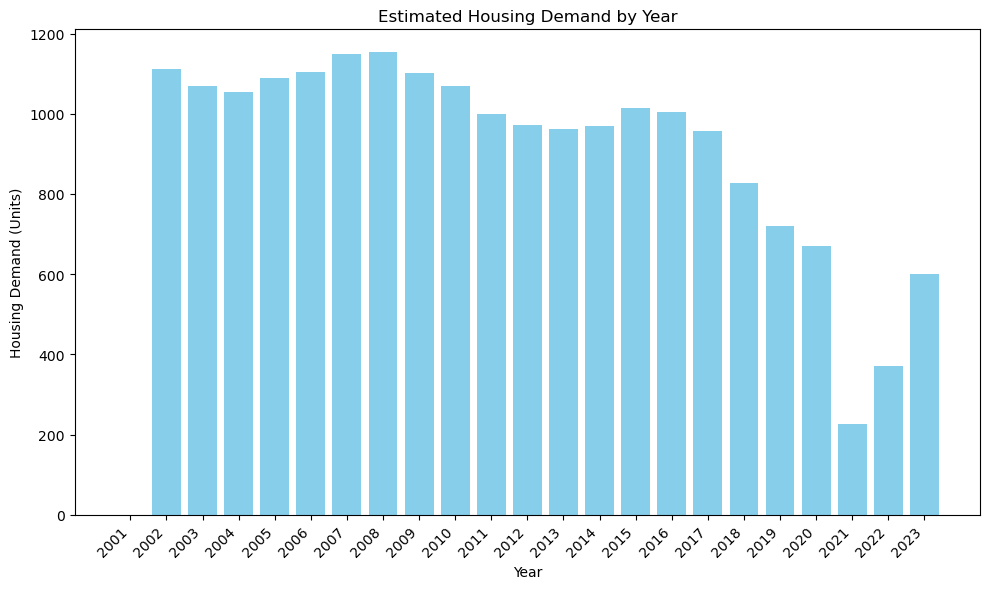

In [111]:
plt.figure(figsize=(10, 6))
plt.bar(combined_df['Date'], combined_df['Housing demand'], color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Housing Demand (Units)')
plt.title('Estimated Housing Demand by Year')
plt.xticks(combined_df['Date'])

# Rotate the x-axis labels for better readability
plt.xticks(combined_df['Date'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()